In [1]:
import sys, os

root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_path not in sys.path:
    sys.path.append(root_path)

from src.inference.pipeline import prepare_from_path
from src.utils.config import *
from src.api.deps import load_resources, get_model, get_id_to_label

os.chdir("..")
print("CWD:", os.getcwd())

CWD: c:\Users\alejo\OneDrive\Escritorio\Universidaad\Maestria Inteligencia de negocios\Segundo Semestre\Seminario Programacion\Proyecto_final


In [2]:
from src.api.deps import load_resources, get_model, get_device, get_class_names

load_resources()
print("Modelo:", get_model().__class__.__name__)
print("Device:", get_device())
print("Clases:", get_class_names())

[deps] Cargado ResNet101 v1.0.0 en cpu; input=224
Modelo: ResNet
Device: cpu
Clases: ['cat', 'dog']


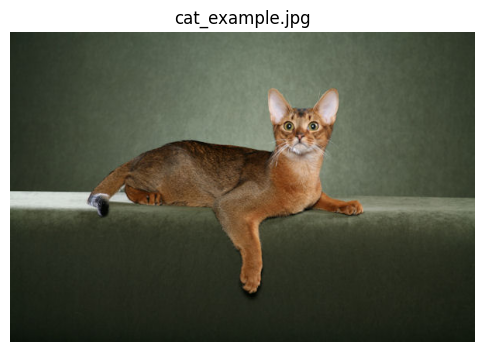

In [3]:
mostrar_imagen("data/processed/examples_oxford/cat_example.jpg")

In [4]:
out = prepare_from_path("data/processed/examples_oxford/cat_example.jpg")
x = out["tensor"]
print(x.shape)

torch.Size([1, 3, 224, 224])


In [5]:
import torch

model = get_model()
model.eval()

with torch.no_grad():
    logits = model(x)                                  
    probs = torch.softmax(logits, dim=1).squeeze(0)    
    
id_to_label = get_id_to_label()
pred_label = id_to_label[int(probs.argmax().item())]

print("Predicción:", pred_label)
print("Scores:", {id_to_label[i]: float(p) for i, p in enumerate(probs)})

Predicción: cat
Scores: {'cat': 0.9767835140228271, 'dog': 0.023216472938656807}
